<a href="https://colab.research.google.com/github/fayesatari/VANET-Simulation/blob/main/Veins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

nodeArray=[5,10,25,100,250]
DowntownTwoRayInterferenceModel=[]   #Downtown-TwoRayInterferenceModel
DowntownSimplePathlossModel=[]       # Downtown-SimplePathlossModel
SuberbSimplePathlossModel =[]        # Suberb-SimplePathlossModel 
SuberbTwoRayInterferenceModel =[]    # Suberb-TwoRayInterferenceModel 


In [ ]:
def parse_if_number(s):
 try: return float(s)
 except:return True if s=="true" else False if s=="false" else s if s else None
# to process a column
def parse_ndarray(s):
 return np.fromstring(s, sep=' ') if s else None



In [ ]:
def parse_Files(Filename , PRRArray):
  mtl_scn = pd.read_csv(Filename, converters = {'attrvalue': parse_if_number,'binedges': parse_ndarray, 'binvalues': parse_ndarray,
                                                'vectime': parse_ndarray, 'vecvalue': parse_ndarray} )
  
  scalars = mtl_scn[(mtl_scn.type=='scalar') | (mtl_scn.type=='itervar')]  # filter rows
  scalars.value = scalars.value.combine_first(scalars.attrvalue.astype('float64'))  # merge value columns

  scalars = scalars[(scalars.type=='scalar')  & (   mtl_scn.module.str.contains('node', regex=True) )   &                   (( mtl_scn.name=='SentPackets' )
   | (mtl_scn.name=='ReceivedBroadcasts') | (mtl_scn.name=='ReceivedUnicastPackets') | (mtl_scn.name=='TotalLostPackets')  )]

  scalars_wide = scalars.pivot('module', columns='name', values='value')
  sumReceivedBroadcasts=scalars_wide.ReceivedBroadcasts.sum()
  sumReceivedUnicastPackets=scalars_wide.ReceivedUnicastPackets.sum()
  sumSentPackets=scalars_wide.SentPackets.sum()
  sumTotalLostPackets=scalars_wide.TotalLostPackets.sum()

  sumPRR=sumReceivedUnicastPackets+sumReceivedBroadcasts / (sumReceivedUnicastPackets+sumReceivedBroadcasts
                                                   +sumSentPackets+sumTotalLostPackets)
 
  PRRPercent =sumPRR* 100
  PRRArray.insert(len(PRRArray), PRRPercent)
  return PRRArray




In [ ]:
#Downtown-TwoRayInterferenceModel
DowntownTwoRayInterferenceModel= parse_Files('Downtown-TwoRayInterferenceModel-5.csv' ,DowntownTwoRayInterferenceModel)
DowntownTwoRayInterferenceModel= parse_Files('Downtown-TwoRayInterferenceModel-10.csv' ,DowntownTwoRayInterferenceModel)
DowntownTwoRayInterferenceModel= parse_Files('Downtown-TwoRayInterferenceModel-25.csv' ,DowntownTwoRayInterferenceModel)
DowntownTwoRayInterferenceModel= parse_Files('Downtown-TwoRayInterferenceModel-100.csv' ,DowntownTwoRayInterferenceModel)
DowntownTwoRayInterferenceModel= parse_Files('Downtown-TwoRayInterferenceModel-250.csv' ,DowntownTwoRayInterferenceModel)

#Downtown-SimplePathlossModel
DowntownSimplePathlossModel = parse_Files('Downtown-SimplePathlossModel-5.csv'   ,DowntownSimplePathlossModel)
DowntownSimplePathlossModel = parse_Files('Downtown-SimplePathlossModel-10.csv'  ,DowntownSimplePathlossModel)
DowntownSimplePathlossModel = parse_Files('Downtown-SimplePathlossModel-25.csv'  ,DowntownSimplePathlossModel)
DowntownSimplePathlossModel = parse_Files('Downtown-SimplePathlossModel-100.csv' ,DowntownSimplePathlossModel)
DowntownSimplePathlossModel = parse_Files('Downtown-SimplePathlossModel-250.csv' ,DowntownSimplePathlossModel)

#Suberb-SimplePathlossModel
SuberbSimplePathlossModel = parse_Files('Suberb-SimplePathlossModel-5.csv'   ,SuberbSimplePathlossModel)
SuberbSimplePathlossModel = parse_Files('Suberb-SimplePathlossModel-10.csv'  ,SuberbSimplePathlossModel)
SuberbSimplePathlossModel = parse_Files('Suberb-SimplePathlossModel-25.csv'  ,SuberbSimplePathlossModel)
SuberbSimplePathlossModel = parse_Files('Suberb-SimplePathlossModel-100.csv' ,SuberbSimplePathlossModel)
SuberbSimplePathlossModel = parse_Files('Suberb-SimplePathlossModel-250.csv' ,SuberbSimplePathlossModel)

#TwoRayInterferenceModel
SuberbTwoRayInterferenceModel = parse_Files('Suberb-TwoRayInterferenceModel-5.csv'    ,SuberbTwoRayInterferenceModel)
SuberbTwoRayInterferenceModel = parse_Files('Suberb-TwoRayInterferenceModel-10.csv'   ,SuberbTwoRayInterferenceModel)
SuberbTwoRayInterferenceModel = parse_Files('Suberb-TwoRayInterferenceModel-25.csv'   ,SuberbTwoRayInterferenceModel)
SuberbTwoRayInterferenceModel = parse_Files('Suberb-TwoRayInterferenceModel-100-1.csv',SuberbTwoRayInterferenceModel)
SuberbTwoRayInterferenceModel = parse_Files('Suberb-TwoRayInterferenceModel-250.csv'  ,SuberbTwoRayInterferenceModel)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


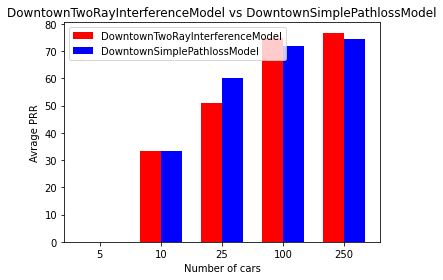

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(nodeArray))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, DowntownTwoRayInterferenceModel, width, label='DowntownTwoRayInterferenceModel' ,color="red")
rects2 = ax.bar(x + width/2, DowntownSimplePathlossModel, width, label='DowntownSimplePathlossModel' ,color="blue")
#ax.title('DowntownTwoRayInterferenceModel vs DowntownSimplePathlossModel')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avrage PRR')
ax.set_xlabel('Number of cars')
ax.set_title('DowntownTwoRayInterferenceModel vs DowntownSimplePathlossModel')
ax.set_xticks(x)
ax.set_xticklabels(nodeArray)
ax.legend()



fig.tight_layout()

plt.show()

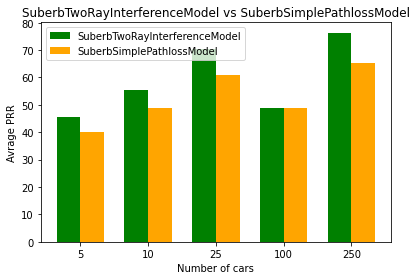

In [ ]:
x = np.arange(len(nodeArray))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, SuberbTwoRayInterferenceModel, width, label='SuberbTwoRayInterferenceModel' ,color="green")
rects2 = ax.bar(x + width/2, SuberbSimplePathlossModel, width, label='SuberbSimplePathlossModel',color="orange")
#ax.title('SuberbTwoRayInterferenceModel vs SuberbSimplePathlossModel')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avrage PRR')
ax.set_xlabel('Number of cars')
ax.set_title('SuberbTwoRayInterferenceModel vs SuberbSimplePathlossModel')
ax.set_xticks(x)
ax.set_xticklabels(nodeArray)
ax.legend()



fig.tight_layout()

plt.show()

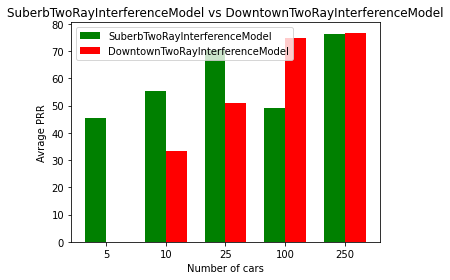

In [ ]:
x = np.arange(len(nodeArray))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, SuberbTwoRayInterferenceModel, width, label='SuberbTwoRayInterferenceModel' ,color="green")
rects2 = ax.bar(x + width/2, DowntownTwoRayInterferenceModel, width, label='DowntownTwoRayInterferenceModel' ,color="red")
#ax.title('SuberbTwoRayInterferenceModel vs DowntownTwoRayInterferenceModel')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avrage PRR')
ax.set_xlabel('Number of cars')
ax.set_title('SuberbTwoRayInterferenceModel vs DowntownTwoRayInterferenceModel')
ax.set_xticks(x)
ax.set_xticklabels(nodeArray)
ax.legend()



fig.tight_layout()

plt.show()

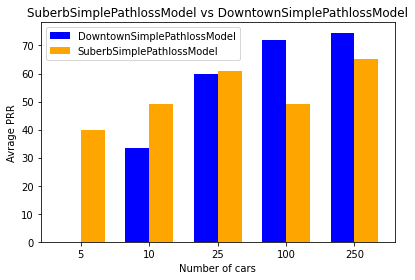

In [ ]:
x = np.arange(len(nodeArray))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, DowntownSimplePathlossModel, width, label='DowntownSimplePathlossModel',color="blue")
rects2 = ax.bar(x + width/2, SuberbSimplePathlossModel, width, label='SuberbSimplePathlossModel' ,color="orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avrage PRR')
ax.set_xlabel('Number of cars')
ax.set_title('SuberbSimplePathlossModel vs DowntownSimplePathlossModel')
ax.set_xticks(x)
ax.set_xticklabels(nodeArray)
ax.legend()



fig.tight_layout()

plt.show()